# Cleaning and Exploring the FIFA Dataset with Pandas and Seaborn

The Fifa 19 Dataset contains a wide-range of information about the players represented in the EA Sports FIFA 19 video game. I downloaded it from the Kaggle Website. You can get the data yourself from this [link](https://www.kaggle.com/karangadiya/fifa19/version/1). FIFA asks thousands of people to collect data on dozens of attributes for thousands of players. The aim is for the data to accurately reflect a player's actual ablities. You can read more about EA Sports' methodology in this [article](https://www.dreamteamfc.com/c/gaming/413665/fifa-19-player-ratings-ronaldo-release-date-black-friday/).  

I will be practicing my abilities to use various Python packages. I will be primarily using Pandas (to perform data manipulation and data cleaning) and Seaborn (for data visualisation). I will also be doing a little machine learning using the Statsmodel package. 

In Python tradition, I will begin with Section 0. In the cell below I import the packages that I will be using in this exploration.




## 0. Importing the Relevant Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (20, 15)




## 1. Introducing the Dataset

Below is an introduction to the FIFA 19 dataset. Initially, I clean the data to get rid of some of the irrelevant columns.

In [2]:
fifa = pd.read_csv("data.csv")

fifa = fifa.drop(fifa[['Photo', 'Flag', 'Club Logo', 'Unnamed: 0', 'ID']], axis =1) #dropping irrelevant columns
fifa.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M





## 2. Cleaning the Financial Data

Right away, it is clear that the financial data (which can be found in the `Wage`, `Value` and `Release Clause` columns) are currently represented as strings. While this is a useful representation from a visual perspective, you are not able to perform statistical analyses on strings.

In order to do the analysis I want to do, it requires me to change the figures into floats. Therefore I had to clean it using the str.contains method and the str.replace method and convert the data to a string. This took a really long time to for me to figure out; especially for the `Value`  and the `Release Clause` columns. I am sure there are more efficient ways of doing this I am just glad this works. 

In [3]:
#Cleaning the Value Column
fifa['Value'] = fifa['Value'].str.replace("€", "")
fifa['New Value 1'] = fifa.Value[fifa['Value'].str.contains("M")].str.replace("M", "").astype("float") * 1000000
fifa['New Value 2'] = fifa.Value[fifa['Value'].str.contains("K")].str.replace("K", "").astype("float") * 1000
first = fifa['New Value 1'][fifa['New Value 1'].notna()]
second = fifa['New Value 2'][fifa['New Value 2'].notna()]
fifa['Value'] = pd.concat([first, second])
fifa = fifa.iloc[:, 0:-2]

In [4]:
#Cleaning the Wage Column
fifa['Wage'] = fifa['Wage'].str.replace("€", "")
fifa['Wage'] = fifa.Wage[fifa['Wage'].str.contains("K")].str.replace("K", "").astype("float") *1000

In [5]:
#Cleaning the Release Clause Column
fifa['Release Clause'] = fifa['Release Clause'].str.replace("€", "")

fifa['Release Clause 1'] = fifa['Release Clause'][fifa['Release Clause'].str.contains(
    "M", na = False)].str.replace("M", "").astype("float") * 1000000

fifa['Release Clause 2'] = fifa['Release Clause'][fifa['Release Clause'].str.contains(
    "K", na = False)].str.replace("K", "").astype("float") * 1000

first = fifa['Release Clause 1'][fifa['Release Clause 1'].notna()]
second = fifa['Release Clause 2'][fifa['Release Clause 2'].notna()]
fifa['Release Clause'] = pd.concat([first, second])
fifa = fifa.iloc[:, 0:-2]

In [6]:
fifa.insert(loc = 8, column ='Release Clause (€)', value = fifa['Release Clause'], allow_duplicates=True)

In [7]:
fifa.drop(columns = 'Release Clause', inplace = True)

In [8]:
pd.set_option("precision", 2)
fifa.describe()

,Age,Overall,Potential,Value,Wage,Release Clause (€),Special,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.00,18207.00,18207.00,1.80e+04,17966.00,1.66e+04,18207.00,18159.00,18159.00,18159.00,...,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00,18159.00
mean,25.12,66.24,71.31,2.44e+06,9861.85,4.59e+06,1597.81,1.11,2.95,2.36,...,48.55,58.65,47.28,47.70,45.66,16.62,16.39,16.23,16.39,16.71
std,4.67,6.91,6.14,5.63e+06,22117.27,1.11e+07,272.59,0.39,0.66,0.76,...,15.70,11.44,19.90,21.66,21.29,17.70,16.91,16.50,17.03,17.96
min,16.00,46.00,48.00,1.00e+04,1000.00,1.30e+04,731.00,1.00,1.00,1.00,...,5.00,3.00,3.00,2.00,3.00,1.00,1.00,1.00,1.00,1.00
25%,21.00,62.00,67.00,3.25e+05,1000.00,5.25e+05,1457.00,1.00,3.00,2.00,...,39.00,51.00,30.00,27.00,24.00,8.00,8.00,8.00,8.00,8.00
50%,25.00,66.00,71.00,7.00e+05,3000.00,1.10e+06,1635.00,1.00,3.00,2.00,...,49.00,60.00,53.00,55.00,52.00,11.00,11.00,11.00,11.00,11.00
75%,28.00,71.00,75.00,2.10e+06,9000.00,3.50e+06,1787.00,1.00,3.00,3.00,...,60.00,67.00,64.00,66.00,64.00,14.00,14.00,14.00,14.00,14.00
max,45.00,94.00,95.00,1.18e+08,565000.00,2.28e+08,2346.00,5.00,5.00,5.00,...,92.00,96.00,94.00,93.00,91.00,90.00,92.00,91.00,90.00,94.00


The above table shows some descriptive statistics for the columns in the dataset. One thing that stands out to me is the variation in the mean of the attributes columns. As show in the random selection of attributes below, you get mean values that  are well above 60 such as `SprintSpeed` but you also get attributes such as `FKAccuracy` which has a mean value of only 42.86.

In [9]:
pd.DataFrame(fifa.describe().iloc[1, 20:-24]).transpose()

,BallControl
mean,58.37





## 3. Cleaning the `Height` and `Weight` Columns and Creating a `BMI` Column

There are two steps needed to create a `BMI` column. Firstly, the `Height` and `Weight` of the players are in feet and pounds respectively. This requires us to convert the column into meters and kilograms. 

The first line of the following cell converts a height in feet and inches (e.g. 5'4) into centimeters. The next cell converts the `Weight` columns into kilograms. Both columns are also converted into floats at the same time.

In [10]:
fifa['Height'] = fifa['Height'].str.split("'").str[0].fillna(0).astype(int).apply(
    lambda x: x * 0.3048 *100) + fifa['Height'].str.split("'").str[1].fillna(0).astype(int).apply(lambda x: x * 0.0254 *100)
fifa['Height'].head()

0    170.18
1    187.96
2    175.26
3    193.04
4    180.34
Name: Height, dtype: float64

In [11]:
fifa['Weight']= fifa.Weight.str.replace('lbs', '').astype('float').apply(lambda x: x *0.453592)

In [12]:
fifa['BMI'] = fifa['Weight'] / fifa['Height'] **2
fifa['BMI'].head()

0    2.49e-03
1    2.35e-03
2    2.22e-03
3    2.04e-03
4    2.15e-03
Name: BMI, dtype: float64

In [13]:
fifa.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Release Clause (€),Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BMI
0,L. Messi,31,Argentina,94,94,FC Barcelona,1.10e+08,565000.0,2.26e+08,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.49e-03
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.70e+07,405000.0,1.27e+08,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2.35e-03
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,1.18e+08,290000.0,2.28e+08,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.22e-03


As seen in the Table above, the data  has been cleaned. The `Height` column and the `Weight` column have been converted from strings to floats which makes it possible to work with the numerical aspects of the data. 

Additionally, I have created a `BMI` column which is a measurement used to indicate whether a person is overweight or not. The `BMI` column will be used later.




## 4. What are the strongest correlations between columns?

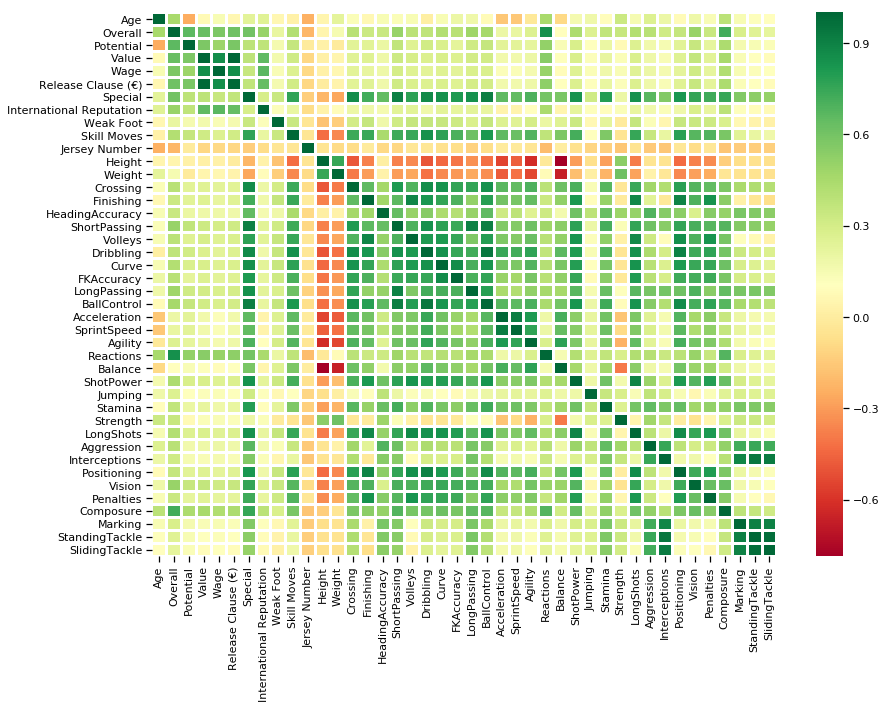

In [14]:
sns.set_context("notebook")
correlations = fifa.iloc[:,0:-6].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlations, cmap = "RdYlGn", linewidths = 2)

#### Graph 1: Heatmap of the Numerical Columns

The above heatmap shows the correlations between all the numerical columns. The more positive a correlation it is the "greener" it appears. The more negative a correlation is the "redder" it appears. 

Given the large amount of green on the graph, this tells us that the correlations tend to be postive. The exceptions to this tend to be found in the `Jersey Number`, `Height` and `Weight` graphs. You can see that all the values at the diagonal are dark green; this is because it is showing the correlations between the same value which by definition have a value of 1.

Most of the columns refer to a players ability for some attribute on a scale of 1 to 100. Players who are better at one attribute tend to be better at another attribute. Some of the strongest correlations are between: 1) `Release Clause (Euro)` and `Value` (r = 0.99), 2) `StandingTackle` and `Interceptions` (r = 0.94), 3) `Dribbling` and `BallControl` (r = 0.94). None of these are surprising as they all measure similar concepts.

The strongest negative correlations can be found between: 1) `Balance` and `Strength`(r = -0.39), 2) `Age` and `Potential` (r = -0.25), 3) `Jersey Number` and `Age` (r = -0.24). These are a little more surprising. I was not expecting such a strongly negative relationship between balance and strength. In contrast to the FIFA data, [this study](https://www.ncbi.nlm.nih.gov/pubmed/22922168) found no relationship between measures of strength and balance.

There are a disproportionately large number of negative correlations relate to the `Jersey Number` number column. This is unsurprising, usually the best players on a team are given jersey numbers from 1 to 11. 

C:\Users\Conynghd\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Conynghd\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


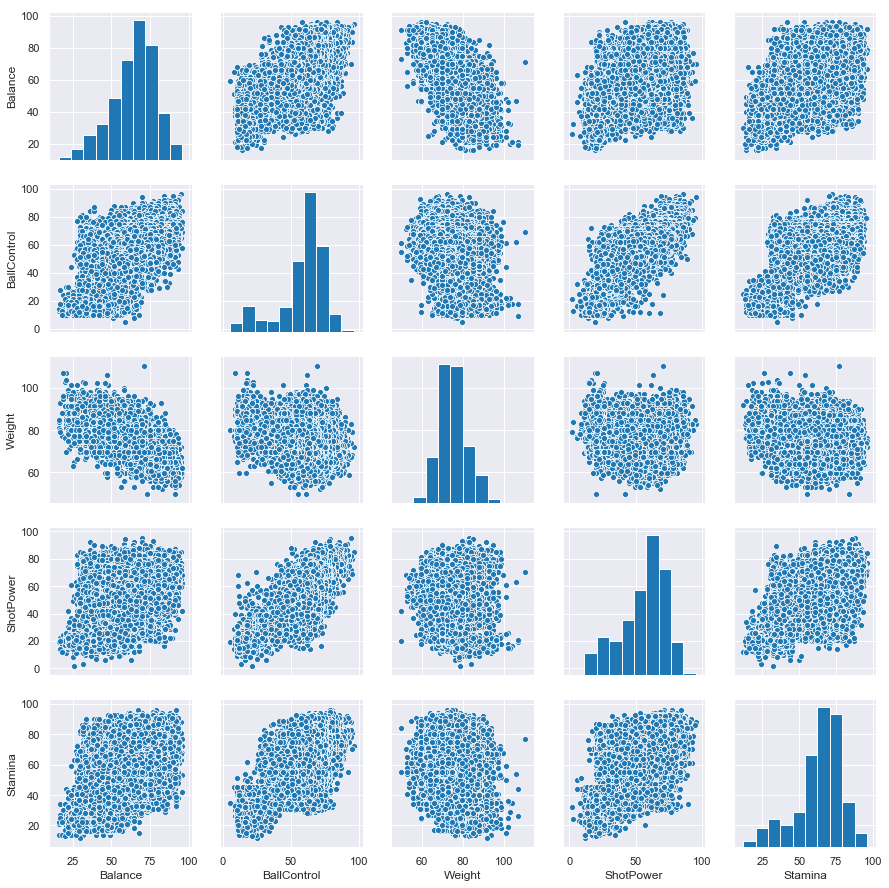

In [15]:
sns.set_style("darkgrid")
sns.set_context("notebook")
sns.pairplot(data = fifa.loc[:, ['Balance', 'BallControl', 'Weight', 'ShotPower', 'Stamina']])

#### Graph 2: Joint Plot showing the relationships between a selection of five player attributes

The Graph above shows the histogram of an attribute on the diagonal and the scatterplot between the two variables on the off-diagonal. The one reasonably strong negative correlation in this subset seems to be between `Weight` and `Balance`. Let us explore this correlation further.

## 5. Exploring the correlations between  `Weight`, `Balance` and `Height`

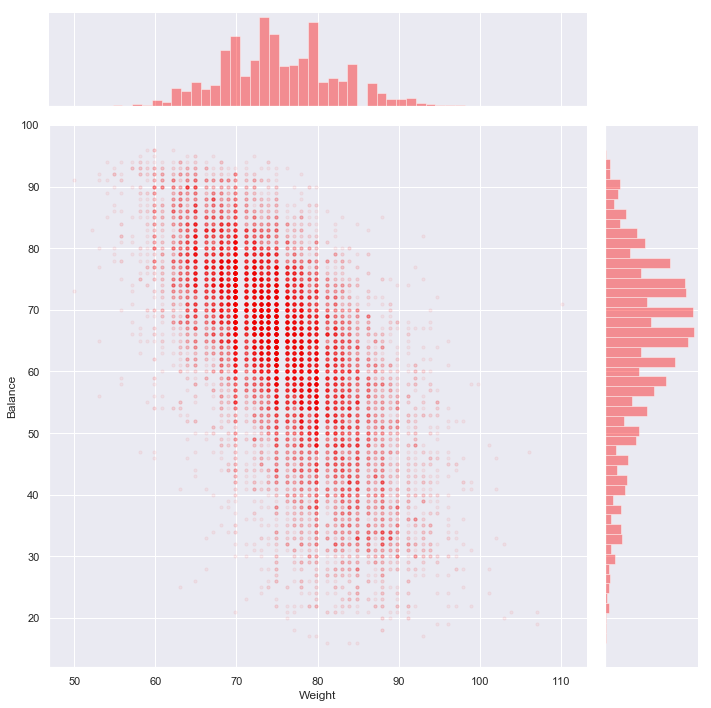

In [16]:
sns.set_context("notebook")
sns.jointplot(x = 'Weight', y = 'Balance', data = fifa, alpha = 0.05, 
              height = 10, color = 'r', joint_kws={"s": 10})

#### Graph 3: A Joint Plot of the correlations between `Weight` and `Balance`

This Joint Plot shows a scatterplot as its main graph but also show two histograms. Above the scatterplot is a histogram of the `Weight` column and to the right is a histogram of the `Balance` column. 

Below is a table showing the three strongest correlations in the dataset.

In [17]:
atr_corr = pd.DataFrame(correlations.unstack().sort_values().drop_duplicates())
atr_corr.head(4)

0
Height Balance      -0.79
Weight Balance      -0.66
Height Agility      -0.62
       Acceleration -0.55

In [18]:
atr_corr.loc[['Height']].tail(1)

,,0
Height,Weight,0.75


The correlation between `Weight` and `Balance` is strong as indicated by the graph above and the table. The table shows that the correlation is -0.66. This is considered to be a strong correlation. Is it reasonable to conclude that this relationship is causal? In other words, does putting on `Weight` lead to a player becoming weaker in terms of `Balance`?

I think we should be reluctant to reach this conclusion for two reasons. Firstly, the strongest negative correlation int the dataset is between `Height` and `Balance` (r = -0.79). Secondly, `Height` and `Weight` are strongly positively correlated (r = 0.75).

Given these two facts it seems likely to me that `Height` is the main factor affecting `Balance`. Whereas, the correlation between `Weight` and `Balance` only exists because `Weight` and `Height` are so strongly correlated. We can test this hypothesis using regression analysis.   

In [19]:
X = fifa[['Height','Weight']].dropna() 
Y = fifa['Balance'].dropna()

X = sm.add_constant(X) 

model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 1.535e+04
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        10:26:54   Log-Likelihood:                -64878.
No. Observations:               18159   AIC:                         1.298e+05
Df Residuals:                   18156   BIC:                         1.298e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        340.2074      1.965    173.115      0.0

C:\Users\Conynghd\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


I use the statsmodels package to test my hypothesis. The table above shows the results of the regression output for the model of: Balance = Height + Weight + Constant. 

Both `Height` and `Weight` are highly statistically significant (both p < 0.001). However, the size of the coefficient for `Height` is much larger than for `Weight` (-1.3864 vs -0.3313). `Weight` is expressed in kilograms and `Height` is expressed in centimeters. 

Controlling for `Height`, a three kilogram increase in a player's `Weight` is associated with roughly a 1 point decrease in a players `Balance`. Whereas, controlling for `Weight`, a one centimeter increase in a player's `Height` is associated with a 1.386 point decline in a player's `Balance`.

`Weight` has a relatively small effect on a player's `Balance`. The effect of `Height` is much larger. This indicates that my hypothesis that `Height` is the main factor affecting `Balance` is true. 

In [20]:
pd.DataFrame(correlations.unstack().sort_values(ascending = False).drop_duplicates().iloc[1:4])

0
Value          Release Clause (€)  0.99
StandingTackle SlidingTackle       0.97
               Interceptions       0.94

The above table shows the three strongest positive correlations in the dataset. The strongest positive correlations tend to have a much larger absolute value than the strongest negative correlations. At least for the columns that refer to a player's ability, this suggests that a player that is above average on one attribute is more likely than not to be above average on another attribute. 

While the correlations I performed in this section are interesting, they do have one major limitation. Correlations like this can mislead in cases where there are non-linear relationships between two variables. In the following section, I will explore a relationship between two variables that we should expect to have a non-linear relationship.




## 6. Relationship between `Age` and `Overall`

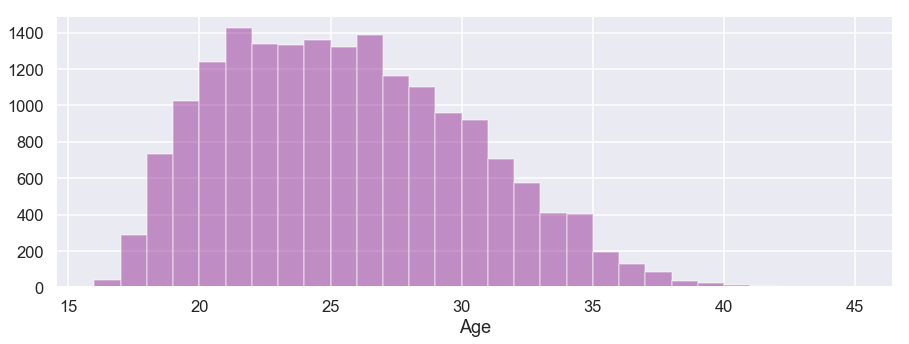

In [21]:
sns.set_style("darkgrid")
sns.set_context("talk")
plt.figure(figsize=(15, 5))
sns.distplot(fifa.Age, bins = 29, kde = False, color = 'purple')

#### Graph 4: Histogram showing the distribution of the player ages in the Fifa Dataset

The most common ages of the footballers in the FIFA Dataset is between the 20 years old and 27 years old. However, we can see that there is a long right-sided tail. Obviously, another factor is that footballers are seen to peak in ability at around 26 years old. We can explore how footballers abilities change over time by looking at the mean ability of footballers by age.

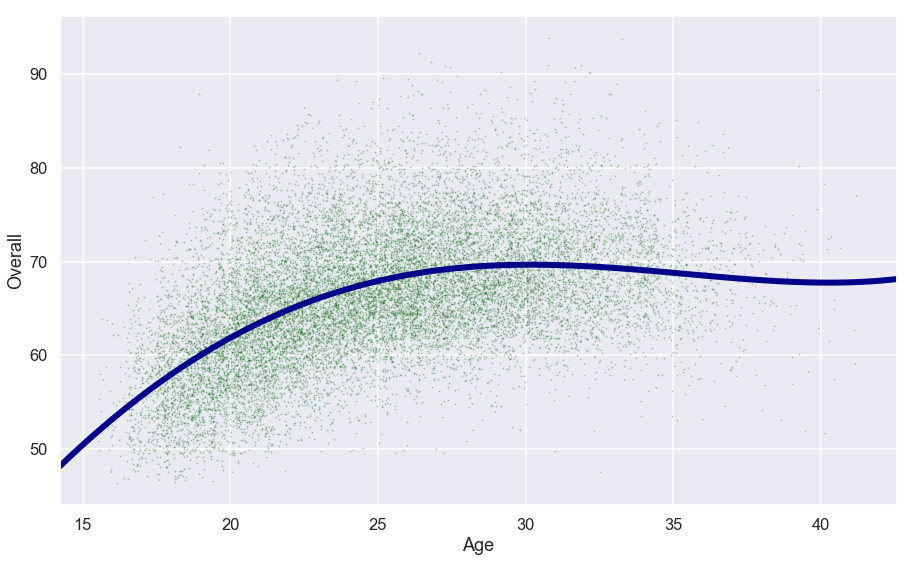

In [22]:
mask = fifa[(fifa.Age <=41) & (fifa.Age >=16)]

plt.figure(figsize = (15, 9))
sns.regplot('Age', 'Overall', data =mask, x_jitter = .5, y_jitter = .5, 
            order = 4, ci = None, scatter_kws={'s':1, 'color': 'darkgreen', 'alpha': .2},
           line_kws= {'lw':6, 'color': 'darkblue'})

#### Graph 5: Jittered Regression Plot (of Order 4) showing FIFA players `Overall` across `Age`.




In Graph 3, Each very green feint dot represents a player. The regression line shows a players `Overall` rapidly increasing through a player's teenage years, peaking at around 30, and then slowly declining

In [23]:
fifa.groupby('Age')['Overall'].agg(['mean', 'median', 'count']).sort_values(by = 'mean', ascending = False).head(15).transpose()

Age,45,31,30,33,34,32,29,28,27,37,26,35,25,36,40
mean,71.0,69.85,69.7,69.56,69.54,69.53,69.25,69.21,68.95,68.94,68.51,68.13,67.97,67.94,67.69
median,71.0,70.00,69.0,69.00,69.00,69.00,69.00,69.00,69.00,70.00,68.00,68.00,67.00,67.00,66.00
count,1.0,707.00,917.0,408.00,404.00,574.00,959.00,1101.00,1162.00,82.00,1387.00,196.00,1319.00,127.00,13.00


The most commonly held wisdom is that a players ability peaks at around 27 or 28. Players, especially attacking players, are considered to be well past their prime by the mid-thirties. However, as shown in Graph x, FIFA 19 has a players ability peaking at 31 years old (ignoring the singular 45 year old), and remaining near a peak level well into the players' thirties. The mean at 40 years old is only 2 points lower than the peak at 31 years old.  

Why is this? It could be selection bias. Only the very best players can continue to play at the top level well into their thirties. Lesser players, who may have been decent in their prime years, may now play in leagues not covered by the FIFA dataset. Another possibility, is that these lesser players may be unwilling to deal with the "indignity" of playing in lower divisions. Or maybe, EA Sports overweighs a player's long-term historical performance rather than their more recent performance for nostalgia reasons. 

Also, There are weird outliers at the age of 44. Probably due to the small sample size. That is why I have filtered the dataset to only include players under the age of 41.

In [24]:
pd.set_option("precision", 2)
correlations.Age[abs(correlations.Age) >0.2 ].to_frame().iloc[1:].round(2).transpose()

,Overall,Potential,Special,International Reputation,Jersey Number,Weight,Reactions,Strength,Aggression,Composure
Age,0.45,-0.25,0.24,0.25,-0.24,0.23,0.45,0.33,0.27,0.39


As can be seen in the dataset above, their are various factors that are highly correlated with age. The strongest are Overall ability and Reactions which are both positively correlated with age. Aggression is positively correlated with age which is surprising given the reputation of hot-headed young players. Obviously, we should not be surprised if many of the findings in this dataset are non-linear.

In [25]:
fifa['Expected Growth'] = fifa['Potential'] - fifa['Overall']
fifa.iloc[:,[0, 1, 2,3, 4, 5, -1]].sort_values(by = ['Expected Growth', 'Potential'], ascending = False).head()

,Name,Age,Nationality,Overall,Potential,Club,Expected Growth
16028,J. von Moos,17,Switzerland,58,84,FC Basel 1893,26
18072,D. Campbell,17,Scotland,50,76,Aberdeen,26
16629,Y. Lenze,17,Germany,57,82,FC Schalke 04,25
17175,B. Mumba,16,England,55,80,Sunderland,25
17784,K. Askildsen,17,Norway,52,77,Stabæk Fotball,25


Above, I create a new column called `Expected Growth`. This metric looks at which players are expected to improve the most over their careers. It is possible that some of these players are undervalued given their relatively average ability now. Unsurprisingly, all these players are very young. They are all European as well.




## 7. Who are the unkown next superstars?

In [26]:
gems = (fifa['Overall'] < 70) & (fifa['Potential'] >85)
fifa[gems].iloc[:, 0:5].sort_values(by = 'Potential', ascending = False)

,Name,Age,Nationality,Overall,Potential
6102,Riqui Puig,18,Spain,69,89
7414,S. Tonali,18,Italy,68,89
6032,J. Arp,18,Germany,69,88
7758,P. Pellegri,17,Italy,67,88
7217,Sergio Gómez,17,Spain,68,87
7952,A. Bastoni,19,Italy,67,87
8191,A. Gomes,17,England,67,87
9485,S. Diop,18,France,66,87
6559,Brahim Díaz,18,Spain,69,86
8145,A. Gouiri,18,France,67,86


I next try to look for future stars that people are not familiar with. These are players that are not yet great players (< 70 Overall), but have huge potential (> 85 Potential). The player who leads this list is the Spanish player Riqui Puig. All the players included in this list are European. Does EA Sports ignore non-European future superstars?




## 8. What factors influence a player's value the most?

In [27]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Release Clause (€),Special,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BMI,Expected Growth
0,L. Messi,31,Argentina,94,94,FC Barcelona,1.10e+08,565000.0,2.26e+08,2202,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.49e-03,0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.70e+07,405000.0,1.27e+08,2228,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2.35e-03,0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,1.18e+08,290000.0,2.28e+08,2143,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.22e-03,1
3,De Gea,27,Spain,91,93,Manchester United,7.20e+07,260000.0,1.39e+08,1471,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,2.04e-03,2
4,K. De Bruyne,27,Belgium,91,92,Manchester City,1.02e+08,355000.0,1.96e+08,2281,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,2.15e-03,1


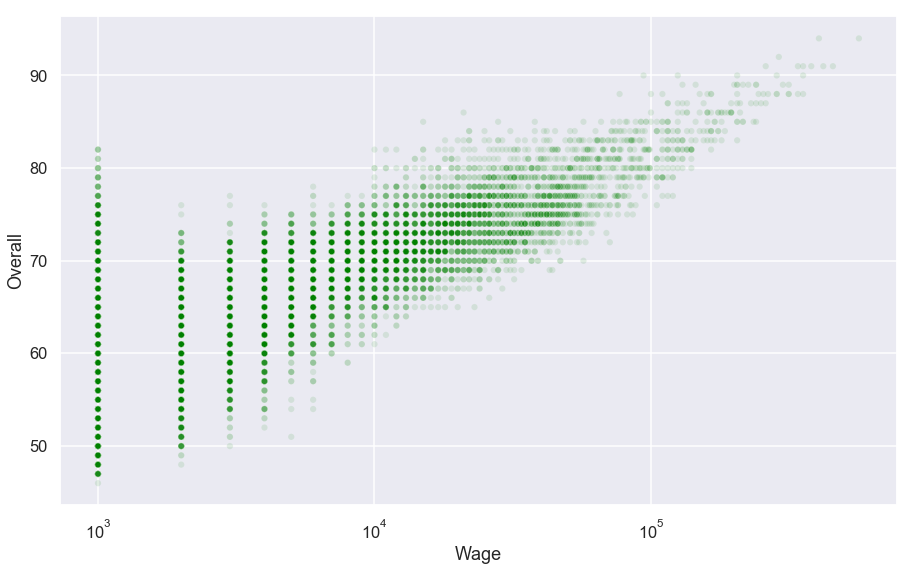

In [28]:
plt.figure(figsize = (15, 9))
ax = sns.scatterplot('Wage', 'Overall', data =fifa, alpha = .1, size =4, color = 'green', 
                     legend = None)
ax.set_xscale('log') 

#### Graph 6: The correlation between Log `Wage` and `Overall` 

As can be seen in the graph above, there standard deviation for a given player's ability decreases as wages rise. In other words, there are a wide-range of abilities among players earning 1000 euros a week but almost the players earning very high wages (i.e. > 100,000 euros a week) have very high ability (i.e. `Overall` of above 80).

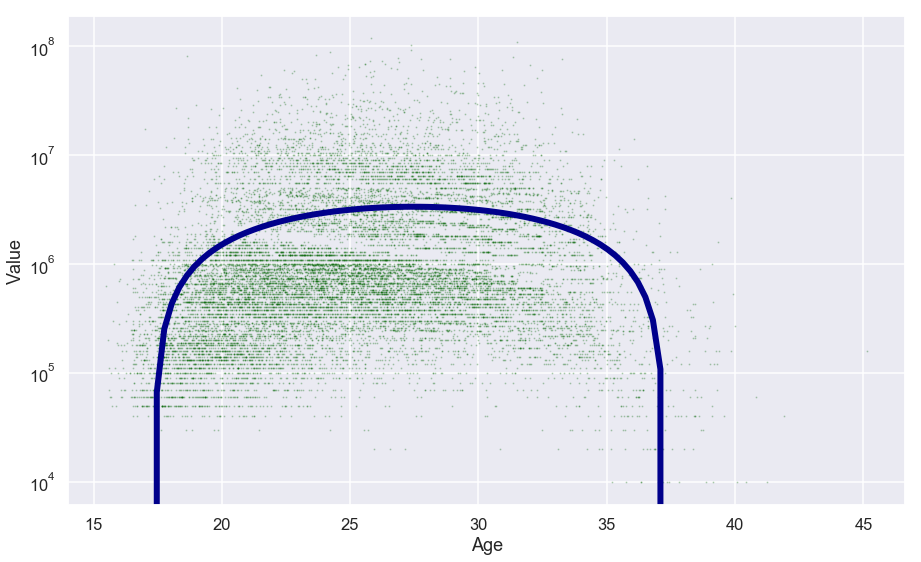

In [29]:
plt.figure(figsize = (15, 9))
sns.set_context("talk")
ax = sns.regplot('Age', 'Value', data =fifa, x_jitter = .5, y_jitter = .5, 
            order = 3, ci = None, truncate = True, scatter_kws={'s':1, 'color': 'darkgreen', 'alpha': .2},
           line_kws= {'lw':6, 'color': 'darkblue'})
ax.set_yscale('log') 

#### Graph 7: Relationship between `Age` and Log `Value`

This has an inverted-'U' relationship. This is unsurprising. As a player increases in Age his ablity first increases and then it decreases.

In [30]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Release Clause (€),Special,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BMI,Expected Growth
0,L. Messi,31,Argentina,94,94,FC Barcelona,1.10e+08,565000.0,2.26e+08,2202,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.49e-03,0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.70e+07,405000.0,1.27e+08,2228,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2.35e-03,0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,1.18e+08,290000.0,2.28e+08,2143,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.22e-03,1
3,De Gea,27,Spain,91,93,Manchester United,7.20e+07,260000.0,1.39e+08,1471,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,2.04e-03,2
4,K. De Bruyne,27,Belgium,91,92,Manchester City,1.02e+08,355000.0,1.96e+08,2281,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,2.15e-03,1





## 9. Are there any bargains?

In [31]:
fifa[fifa.Value > fifa['Release Clause (€)']]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Release Clause (€),Special,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BMI,Expected Growth
17406,P. Plewka,18,Poland,54,66,Wisła Kraków,110000.0,1000.0,109000.0,1405,...,43.0,43.0,49.0,8.0,14.0,11.0,8.0,13.0,2.27e-03,12


There is only one player, P. Plewka from Poland, in the dataset whose `Value` is greater than his `Release Clause`. 




## 10. What are the next great African teams?

Below I look at a selection of African teams to see which ones are likely to be the next great teams. I evaluate this based on the `potential` of the players in the dataset. The teams I have chosen to focus on are Nigeria, South Africa, Tunisia, Ghana, Egypt and Senegal.

In [32]:
certnat = fifa[(fifa.Nationality == 'Nigeria') | (fifa.Nationality == 'South Africa')  | (fifa.Nationality == 'Tunisia')  |
              (fifa.Nationality == 'Ghana') | (fifa.Nationality == 'Egypt') | (fifa.Nationality == 'Senegal') ]
certnat.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Release Clause (€),Special,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BMI,Expected Growth
26,M. Salah,26,Egypt,88,89,Liverpool,6.95e+07,255000.0,1.37e+08,2146,...,38.0,43.0,41.0,14.0,14.0,9.0,11.0,14.0,2.32e-03,1
44,K. Koulibaly,27,Senegal,87,90,Napoli,5.10e+07,115000.0,9.05e+07,1660,...,91.0,88.0,86.0,7.0,11.0,7.0,13.0,5.0,2.52e-03,3
58,S. Mané,26,Senegal,86,87,Liverpool,5.20e+07,195000.0,1.03e+08,2110,...,42.0,42.0,38.0,10.0,10.0,15.0,7.0,14.0,2.24e-03,1
198,I. Gueye,28,Senegal,83,83,Everton,2.10e+07,125000.0,3.99e+07,2055,...,84.0,89.0,84.0,8.0,6.0,8.0,12.0,13.0,2.16e-03,0
249,T. Partey,25,Ghana,82,88,Atlético Madrid,2.55e+07,59000.0,5.74e+07,2068,...,80.0,83.0,80.0,11.0,13.0,9.0,9.0,7.0,2.24e-03,6


Text(2.04, 87.66, 'Thomas Partey')

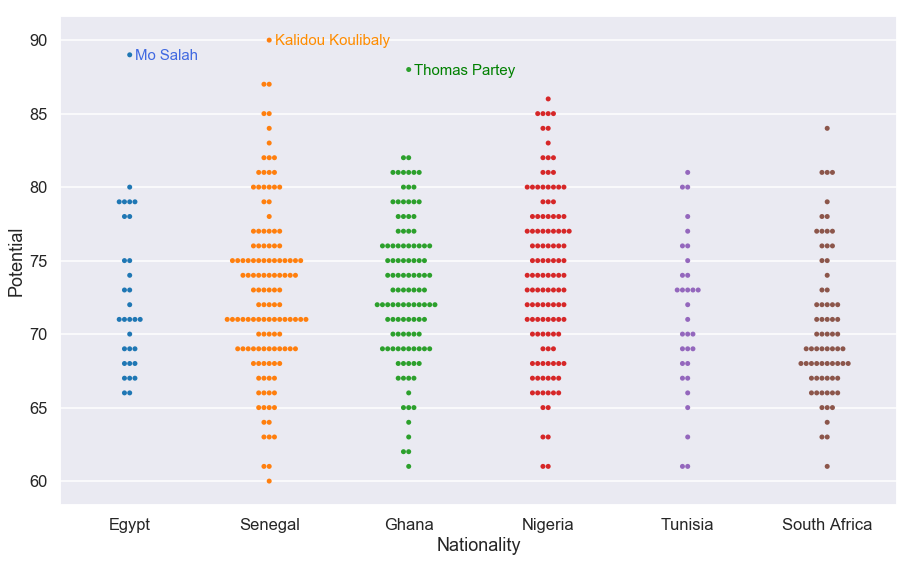

In [33]:
plt.figure(figsize = (15, 9))
sns.swarmplot(x = 'Nationality', y = 'Potential', data = certnat)

plt.text(0.04, 88.66, "Mo Salah", horizontalalignment='left', size='small', color='royalblue')
plt.text(1.04, 89.66, "Kalidou Koulibaly", horizontalalignment='left', size='small', color='darkorange')
plt.text(2.04, 87.66, "Thomas Partey", horizontalalignment='left', size='small', color='green')

#### Graph 8: A Swarmplot showing the distributions of the `Potential` of players from 6 different African countries.

The focus should not be on the lower end of the `Potential` but rather on the top end. Players with a lower `Potential` are just not likely to get into the team. Rather the focus should be on how many players each team has with very high `Potential`. Based on this evaluation, it is clear that Senegal and Nigeria are the two standouts. Both teams have more than ten players with a potential of over 80.




## 11. Which teams should be favorites for the next World Cups?

Below I try to figure out what the next great national teams are. To estimate this I looked at the teams with the most players above 85 in `potential` and are under the age of 24.

In [34]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Release Clause (€),Special,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BMI,Expected Growth
0,L. Messi,31,Argentina,94,94,FC Barcelona,1.10e+08,565000.0,2.26e+08,2202,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2.49e-03,0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,7.70e+07,405000.0,1.27e+08,2228,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2.35e-03,0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,1.18e+08,290000.0,2.28e+08,2143,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,2.22e-03,1
3,De Gea,27,Spain,91,93,Manchester United,7.20e+07,260000.0,1.39e+08,1471,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,2.04e-03,2
4,K. De Bruyne,27,Belgium,91,92,Manchester City,1.02e+08,355000.0,1.96e+08,2281,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,2.15e-03,1


In [35]:
futstars = fifa[(fifa.Potential > 85) & (fifa.Age <24)]
hfut = futstars.groupby('Nationality')['Potential'].count().sort_values(ascending = False).head(10)
hfut

Nationality
France         27
Spain          21
Italy          14
Germany        13
England        12
Portugal       11
Brazil         11
Netherlands     5
Argentina       4
Uruguay         3
Name: Potential, dtype: int64

France is the clear leader here with 27 players below the age of 24 and with a potential of over 85. Players like Kylian Mbappe typify this. Other countries with strong possible futures are Spain, Italy, Germany and England. It looks as if the future of National football will continue to be dominated by European teams.

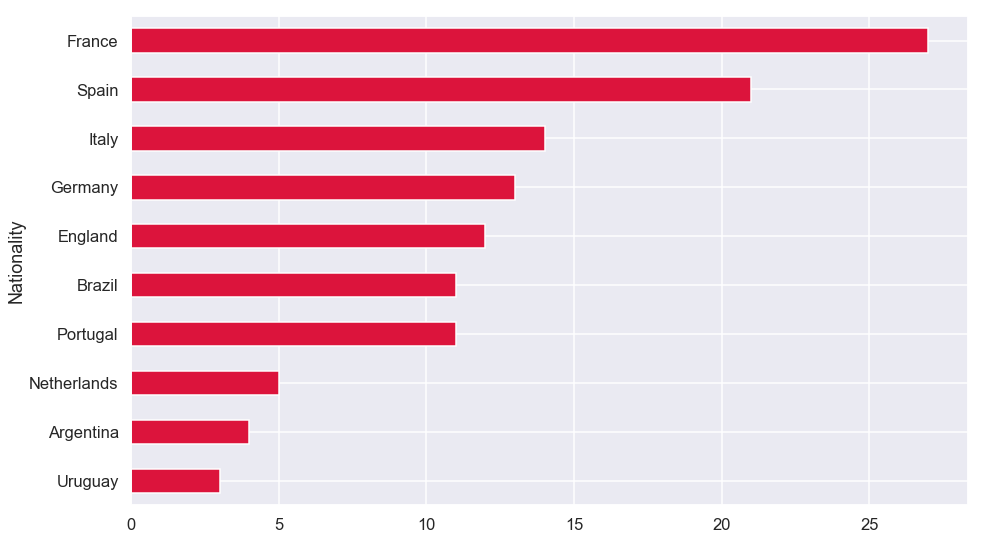

In [36]:
plt.figure(figsize = (15, 9))
hfut.sort_values(ascending = True).plot(kind = 'barh', color = "crimson")

#### Graph 9: A Bar Chart showing the countries with the most likely Future Stars

In [37]:
fifa[fifa.Nationality == "Ghana"].sort_values('Potential').tail()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Release Clause (€),Special,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,BMI,Expected Growth
2588,B. Mensah,23,Ghana,74,81,Kayserispor,8.00e+06,33000.0,NaN,1899,...,50.0,55.0,30.0,15.0,13.0,12.0,10.0,11.0,1.99e-03,7
1226,F. Acheampong,24,Ghana,76,81,Tianjin TEDA FC,1.05e+07,16000.0,2.34e+07,2035,...,42.0,62.0,52.0,14.0,9.0,10.0,16.0,13.0,2.20e-03,5
1237,E. Boateng,22,Ghana,76,82,Levante UD,1.05e+07,22000.0,2.42e+07,1908,...,36.0,35.0,33.0,15.0,13.0,13.0,14.0,12.0,2.02e-03,6
1570,G. Donsah,22,Ghana,76,82,Bologna,1.05e+07,27000.0,2.00e+07,2096,...,82.0,72.0,72.0,14.0,12.0,7.0,7.0,12.0,2.27e-03,6
249,T. Partey,25,Ghana,82,88,Atlético Madrid,2.55e+07,59000.0,5.74e+07,2068,...,80.0,83.0,80.0,11.0,13.0,9.0,9.0,7.0,2.24e-03,6





## 12. Do Footballers generally have a normal BMI?

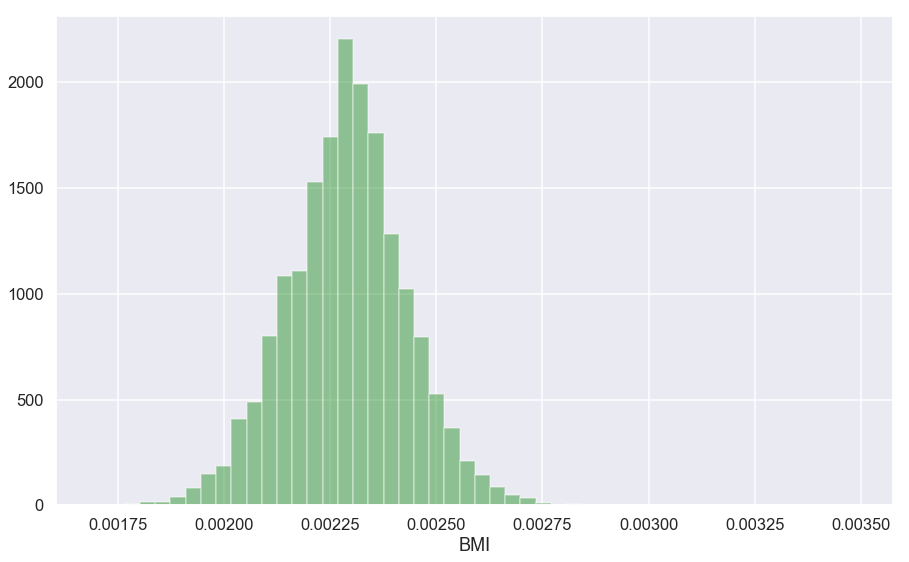

In [38]:
plt.figure(figsize = (15, 9))
sns.set_context("talk")
sns.distplot(fifa['BMI'].dropna(), color = 'green', kde = False)

#### Graph 8: Histogram showing the distribution of `BMI` in the dataset.

As can be seen in Graph 8 above, the vast majority of footballers (more than 91%) have BMI's within the normal range (between 20 and 25). 




## 12. Conclusions

I have used the FIFA Dataset to test my abilities at using various Python packages and to answer various questions related to football. This is not meant to be an in-depth analysis on any one topic, but rather an exploration into using Python to perform data analysis and data visualisation.

I am eager to receive feedback.